In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn  # Data Set을 가져오기 위한 utility module
from sklearn.svm  import SVC  # 분류작업을 할거기 때문에
                                            # SVC(support vector classifier)를 이용
# decision boundaries가 잘 만들어졌는지 확인!
# 일반적인 방식으로는 그래프를 그리기가 힘들어요!
# 그래서 결정경계를 잘 그릴 수 있는 library를 사용할꺼예요!
from mlxtend.plotting import plot_decision_regions

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-77co_yma because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


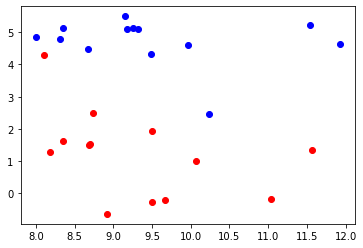

[[ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]
[3 3]


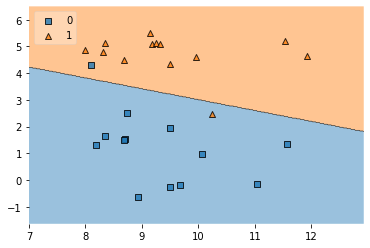

In [2]:
# Raw Data Loading
x_data, t_data = mglearn.datasets.make_forge()  # 데이터를 불러들여요!
# 데이터가 2개가 나와요.
# 그 중 하하는 x_data로 사용할꺼예요. feature로 사용할꺼예요!
# 나머지 하나는 t_data로 사용할꺼예요. 종속변수(target)로 사용할꺼예요!
print(x_data)
print(t_data)

# matplotlib을 이용해서 데이터를 scatter를 통해서 확인할꺼예요!
# 각 데이터(x_data)에 대해 t_data가 0이면 red점으로, 1이면 blue점으로 표시해보아요!
x_data_red = x_data[t_data == 0]
x_data_blue = x_data[t_data == 1]

plt.scatter(x_data_red[:, 0],
            x_data_red[:, 1],
            color='red')
plt.scatter(x_data_blue[:, 0],
            x_data_blue[:, 1],
            color='blue')
plt.show()

# Model 생성
model = SVC(kernel='linear')
model.fit(x_data, t_data)

# 모델 학습이 끝나요!
# 우리가 알아낸 support vector는 어떤것 일까요?
print(model.support_vectors_)
print(model.n_support_)  # [3 3] => 클래스(분류)가 2개고
                                     # 각 분류에 support vector가 3개씩 있다는 의미

# decision boundaries를 그려보아요!
plot_decision_regions(X=x_data,
                      y=t_data,
                      clf=model,
                      legend=2)
plt.show()

0.7555555555555555


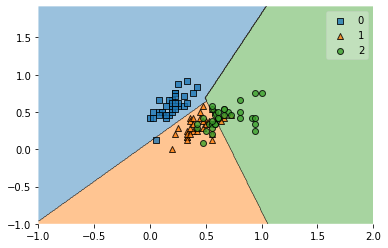

In [25]:
# Multinomial Classification(다중분류)을 SVM으로 구현해 보아요!
# iris데이터를 가지고 해 보아요!

# decision boundaries를 찾아서 그래프를 그려보세요!
# 그런데 feature가 4개(꽃받침의 길이, 너비 그리고 꽃잎의 길이, 너비)

# 차원축소를 이용해서 새로운 2개의 feature를 생성하던가
# 아니면 상관관계분석과 같은걸 통해서 필요없는 feature를 제거!

# 이번에는 차원축소가 아닌. . . 꽃받침의 길이와 너비만 가지고 한번 해 보아요!
# sepal_width, sepal_length만 가지고 (feature 2개만 가지고!!)

# SVM을 만들어서 우리 모델의 정확도가 얼마인지. . .
# 그리고 decision boundaries는 어떻게 그려지는지 그래프로 확인!

# 직접 구현해 보아요!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import  load_iris
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 결측치, 이상치, 중복데이터, 정규화 등등의 feature enginerring과 데이터 전처리가 진행이 되야겠죠.
# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
x_data = df.drop(['target', 'petal_length', 'petal_width'], axis=1, inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

# model 생성
model = SVC(kernel='linear',
            C=1)
model.fit(x_data_train_norm,
          t_data_train)

# Evaluation을 진행해 보아요!
result = accuracy_score(t_data_test, model.predict(x_data_test_norm))
print(result)

plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()

In [26]:
# 위에서 구현한것처럼 무지성으로 두개의 feature를 그냥 없애버렸더니
# 결과가 상당히 좋지 않게 나왔어요!

# 잘못버렸다!!! feature를 잘 못 삭제한거 같아요!
# 실제 의미있는 feature를 삭제하고 의미없는 feature를 포함한거 같아요!

# 차라리 2차원으로 표현할꺼면 PCA(주성분분석)을 통해서 차원축소하는게 좋을 듯 싶어요!

0.8444444444444444


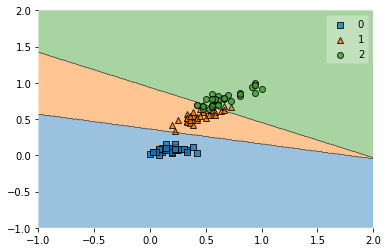

In [27]:
# 길이만 가지고 해 보아요!
# 꽃받침의 길이와 꽃잎의 길이만 가지고 학습을 진행해 보아요!

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 중복데이터 처리
df = df.drop_duplicates()

# 데이터 추출
x_data = df.drop(['target', 'sepal_width', 'petal_width'], axis=1, inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

# model 생성
model = SVC(kernel='linear',
            C=1)


model.fit(x_data_train_norm,
          t_data_train)

# Evaluation을 진행해 보아요!
result = accuracy_score(t_data_test, model.predict(x_data_test_norm))
print(result)

plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()

# 그래도 그다지 좋지 않네요.

0.9777777777777777


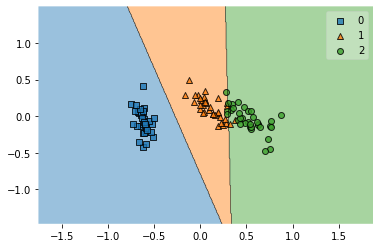

In [28]:
# 주성분분석을 통해서 한번 차원축소된 데이터를 이용해서 한번 처리해 보아요!

# PCA를 통해 차원축소된 데이터로 처리하면 결과가 어떻게 될까요?
from sklearn.decomposition import PCA

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 중복데이터 처리
df = df.drop_duplicates()

# 데이터 추출
x_data = df.drop(['target'], axis=1, inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
x_data_train_norm_pca = pca.fit_transform(x_data_train_norm)
x_data_test_norm_pca = pca.transform(x_data_test_norm)

# model 생성
model = SVC(kernel='linear',
            C=1)

model.fit(x_data_train_norm_pca,
          t_data_train)

# Evaluation을 진행해 보아요!
result = accuracy_score(t_data_test, model.predict(x_data_test_norm_pca))
print(result)

plot_decision_regions(X=x_data_train_norm_pca,
                      y=t_data_train,
                      clf=model)
plt.show()

In [29]:
# 마지막으로 SVM으로 모델을 생성해 볼껀데!!
# 사용하는 데이터는 iris 데이터를 이용
# feature의 개수는 4개를 다 이용(꽃받침 길이, 너비 그리고 꽃잎의 길이, 너비)
# hyperparamer를 지정해서 모델을 생성해야 하는데 이 작업을 자동화 시킬꺼예요!

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
# display(df)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'], axis=1, inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# param_grid를 하나 설정해요!
param_grid = [{
    'kernel' : ['linear'],
    'C' : [0.1, 0.5, 10, 100]
}, {
    'kernel' : ['rbf'],
    'C' : [0.1, 0.5, 10, 100],
    'gamma' : [0.001, 0.001, 0.1]
}]

# model을 만들어요!
model = SVC()

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(x_data_train_norm,
                t_data_train)

# 당연히 가장 좋은 parameter가 어떤 parameter인지 알려줘야지
# 우리가 그걸 가져다가 사용하겠죠.
# 그러면서 해당 parameter를 이용했을때의 정확도도 같이 알려줘요!
print(grid_search.best_params_)
print(grid_search.best_score_)

# 가장 parameter를 알아냈으니 이제 모델을 만들면 되겠죠
model = SVC(kernel='linear',
            C=10)

# 학습
model.fit(x_data_train_norm,
          t_data_train)

# 평가
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'kernel': 'linear'}
0.9709523809523809
1.0
